In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
mtcars1 = pd.read_csv('./mtcars.csv')
mtcars1.head(10)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [26]:
mtcars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [27]:
mtcars_subset = mtcars1[['hp', 'drat']]

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(mtcars_subset)

mtcars_subset['Cluster'] = kmeans.labels_

print("Centroidy zhlukov:", kmeans.cluster_centers_)
print("Priradenia k zhlukom:", kmeans.labels_)

Centroidy zhlukov: [[215.69230769   3.30153846]
 [ 99.47368421   3.79842105]]
Priradenia k zhlukom: [1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1]


/var/folders/pp/f9mc48911vs717rh_h3szgx80000gn/T/ipykernel_25319/4021932978.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtcars_subset['Cluster'] = kmeans.labels_


In [29]:
contingency_table = pd.crosstab(mtcars1['vs'], mtcars_subset['Cluster'])
print(contingency_table)

Cluster   0   1
vs             
0        13   5
1         0  14


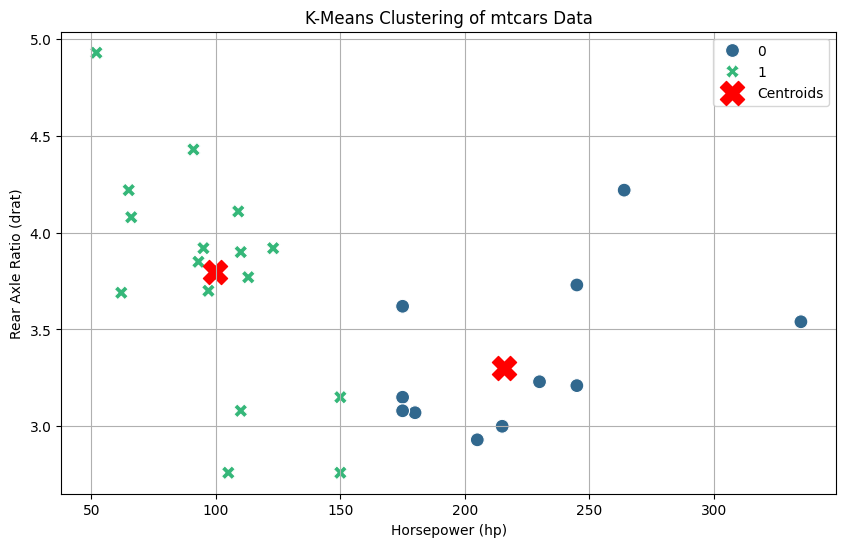

In [30]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=mtcars_subset,
    x='hp', y='drat',
    hue='Cluster',
    palette='viridis',
    style='Cluster',
    s=100
)

centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, c='red', label='Centroids', marker='X'
)

plt.title('K-Means Clustering of mtcars Data')
plt.xlabel('Horsepower (hp)')
plt.ylabel('Rear Axle Ratio (drat)')
plt.legend()
plt.grid()
plt.show()


In [31]:
mtcars2 = mtcars1[['mpg', 'qsec']]

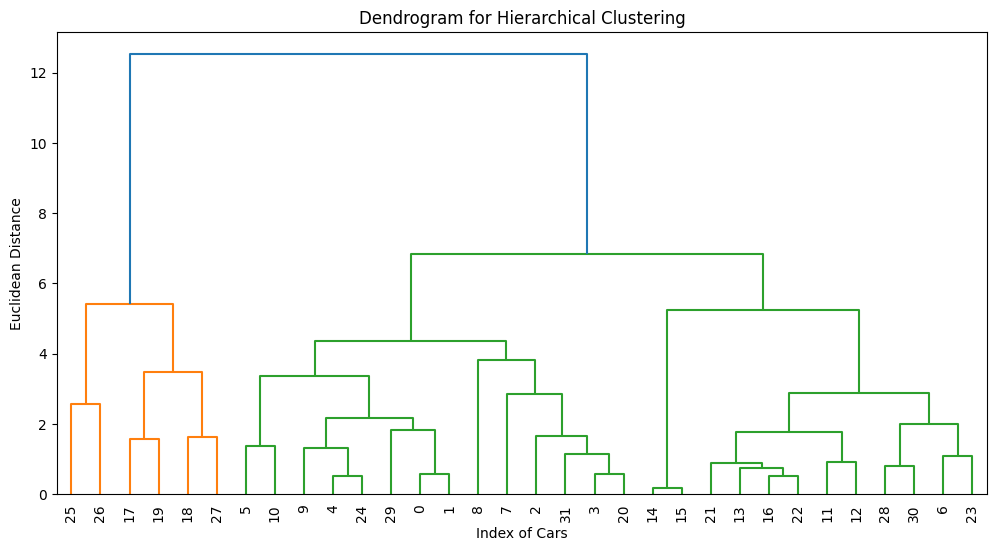

In [32]:
hc2 = linkage(mtcars2, method='average', metric='euclidean')

plt.figure(figsize=(12, 6))
dendrogram(
    hc2,
    labels=mtcars1.index,  # Use row indices as labels
    leaf_rotation=90,      # Rotate labels for better readability
    leaf_font_size=10      # Adjust font size
)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Index of Cars')
plt.ylabel('Euclidean Distance')
plt.axhline(y=15, color='red', linestyle='--')  # Optional: Mark a cutoff for 3 clusters
plt.show()


In [33]:
mtcars1['groups'] = fcluster(hc2, t=3, criterion='maxclust')

print(mtcars1[['mpg', 'qsec', 'groups']])

     mpg   qsec  groups
0   21.0  16.46       2
1   21.0  17.02       2
2   22.8  18.61       2
3   21.4  19.44       2
4   18.7  17.02       2
5   18.1  20.22       2
6   14.3  15.84       3
7   24.4  20.00       2
8   22.8  22.90       2
9   19.2  18.30       2
10  17.8  18.90       2
11  16.4  17.40       3
12  17.3  17.60       3
13  15.2  18.00       3
14  10.4  17.98       3
15  10.4  17.82       3
16  14.7  17.42       3
17  32.4  19.47       1
18  30.4  18.52       1
19  33.9  19.90       1
20  21.5  20.01       2
21  15.5  16.87       3
22  15.2  17.30       3
23  13.3  15.41       3
24  19.2  17.05       2
25  27.3  18.90       1
26  26.0  16.70       1
27  30.4  16.90       1
28  15.8  14.50       3
29  19.7  15.50       2
30  15.0  14.60       3
31  21.4  18.60       2


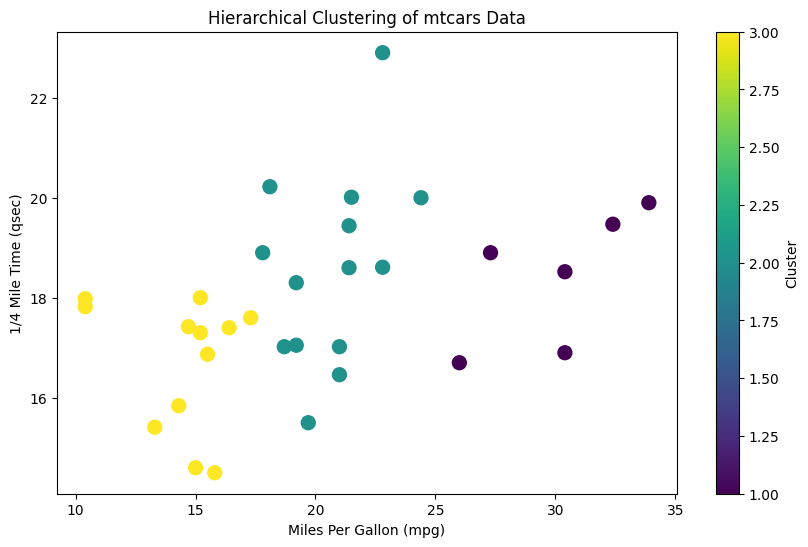

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(mtcars2['mpg'], mtcars2['qsec'], c=mtcars1['groups'], cmap='viridis', s=100)
plt.title('Hierarchical Clustering of mtcars Data')
plt.xlabel('Miles Per Gallon (mpg)')
plt.ylabel('1/4 Mile Time (qsec)')
plt.colorbar(label='Cluster')
plt.show()

In [35]:
AdultUCI = pd.read_csv("http://peter.butka.website.tuke.sk/res/AdultUCI_world.csv")
AdultUCI.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small


In [36]:
AdultUCI.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [37]:
categorical_cols = AdultUCI.select_dtypes(include=['object']).columns
AdultUCI1 = AdultUCI[categorical_cols].apply(lambda x: x.astype('category'))

AdultUCI1

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,small
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,small
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,small
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,small
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,small
...,...,...,...,...,...,...,...,...,...
48837,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,NaN
48838,NaN,HS-grad,Widowed,NaN,Other-relative,Black,Male,United-States,NaN
48839,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,NaN
48840,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,NaN


In [38]:
one_hot_data = pd.get_dummies(AdultUCI1)

one_hot_data

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_large,income_small
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
48839,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
48840,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [39]:
from mlxtend.frequent_patterns import apriori, association_rules

In [40]:
frequent_itemsets = apriori(one_hot_data, min_support=0.01, use_colnames=True)

rules1 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.68, num_itemsets=4)

rules1 = rules1[rules1['consequents'].apply(lambda x: any('income' in item for item in x))]

rules1 = rules1.sort_values(by='lift', ascending=False)
print("Association rules sorted by Lift:")
print(rules1)

Association rules sorted by Lift:
                                             antecedents     consequents  \
20587  (race_White, workclass_Private, relationship_O...  (income_small)   
15395  (marital-status_Never-married, workclass_Priva...  (income_small)   
8524   (race_White, occupation_Other-service, workcla...  (income_small)   
2710   (occupation_Other-service, workclass_Private, ...  (income_small)   
15894  (workclass_Private, relationship_Own-child, oc...  (income_small)   
15411  (workclass_Private, relationship_Own-child, oc...  (income_small)   
7893   (marital-status_Never-married, occupation_Othe...  (income_small)   
14056  (sex_Male, workclass_Private, relationship_Own...  (income_small)   
8534   (occupation_Other-service, native-country_Unit...  (income_small)   
19800  (sex_Male, race_White, workclass_Private, rela...  (income_small)   
19820  (sex_Male, workclass_Private, relationship_Own...  (income_small)   
12034  (race_White, occupation_Other-service, relatio.

In [41]:
non_redundant_rules = []
for index, rule in rules1.iterrows():
    is_redundant = False
    for non_redundant_rule in non_redundant_rules:
        if (rule['antecedents'].issubset(non_redundant_rule['antecedents']) and rule['consequents'].issubset(non_redundant_rule['consequents'])):
            is_redundant = True
            break
    if not is_redundant:
        non_redundant_rules.append(rule)

non_redundant_rules = pd.DataFrame(non_redundant_rules)

print("Non-redundant association rules:")
print(non_redundant_rules)


Non-redundant association rules:
                                             antecedents     consequents  \
20587  (race_White, workclass_Private, relationship_O...  (income_small)   
14056  (sex_Male, workclass_Private, relationship_Own...  (income_small)   
19800  (sex_Male, race_White, workclass_Private, rela...  (income_small)   
19820  (sex_Male, workclass_Private, relationship_Own...  (income_small)   
15360  (occupation_Handlers-cleaners, marital-status_...  (income_small)   
7853   (marital-status_Never-married, occupation_Hand...  (income_small)   
14227  (sex_Female, workclass_Private, relationship_O...  (income_small)   
19883  (sex_Male, workclass_Private, relationship_Own...  (income_small)   
4339   (sex_Female, education_Some-college, relations...  (income_small)   
19815  (sex_Female, workclass_Private, relationship_O...  (income_small)   
19418  (race_White, sex_Female, education_HS-grad, wo...  (income_small)   
15367  (occupation_Handlers-cleaners, sex_Male, workc..